## Name: Deep Kothari
###Data Science & Business Analytics Task 1:
#Prediction using Supervised ML

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Uploading the dataset using pandas
data = pd.read_csv('/content/Tspark-Task1(Prediction using Supervised ML).csv')

In [ ]:
#Printing the dataset
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
#Checking how many columns and rows are present in the dataset
data.shape #There are 25 rows and 2 columns

(25, 2)

In [ ]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
#Minimum and Maximum values in the dataset
print(f'The minimum values in the dataset are: {data.min()}')
print(f'The maximum values in the dataset are: {data.max()}')

The minimum values in the dataset are: Hours      1.1
Scores    17.0
dtype: float64
The maximum values in the dataset are: Hours      9.2
Scores    95.0
dtype: float64


In [ ]:
#Description of the dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


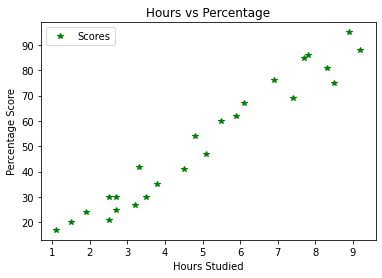

In [ ]:
#Plotting a scatter plot to see the distribution of the scores
data.plot(x='Hours', y='Scores', style='*', color = 'green')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [ ]:
''' We can see that there is a positive linear relation between the 'Hours Studied' & the 'Percentage Scored'
So, we'll the apply Linear Regression model'''

Dividing the data into input and output

In [ ]:
x1 = data.drop(['Scores'],axis=1)
x = x1.to_numpy()
y1 = data['Scores']
y = y1.to_numpy()

In [ ]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

# Splitting the data into training and testing set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=69)

In [ ]:
#Applying the Linear Regression Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()  
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

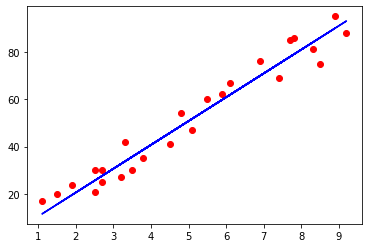

In [ ]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_    # y = mx + c

# Plotting for the test data
plt.scatter(x, y, color = 'red')
plt.plot(X, line, color = 'blue');
plt.show()

In [ ]:
#Prediction on the test data
y_pred = lr.predict(x_test)
y_pred

array([74.90576051, 61.8441064 , 25.67337194, 48.78245229, 11.60697521])

In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,69,74.905761
1,67,61.844106
2,30,25.673372
3,54,48.782452
4,17,11.606975


# Prediction

In [ ]:
#Making Prediction
hrs = 9.25
a = lr.predict([[hrs]])
print(f'The number of hours are :{hrs}')
print(f'The predicted Score is :{a}')

The number of hours are :9.25
The predicted Score is :[93.49349906]


# Model Evaluation

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R-squared value: ", metrics.r2_score(y_test, y_pred))

MAE: 5.199770934490488
MSE: 27.29769538229271
RMSE: 5.224719646286555
R-squared value:  0.9356550646278222
